## 0. Tips data EDA 

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 



In [642]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the "mpg" datasetdf = sns.load_dataset("tips")
df = sns.load_dataset("tips")

# Print the first few rows of the dataset
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


&nbsp; a) Start by doing some initial EDA such as info(), describe().


In [643]:
# a) Initial EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [644]:
df.isnull().sum() # no missing values in df

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

In [645]:
descriptive=df.describe()
descriptive

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [646]:

# remove the 'count' row
descriptive_stats = descriptive.drop('count')
descriptive_stats



,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


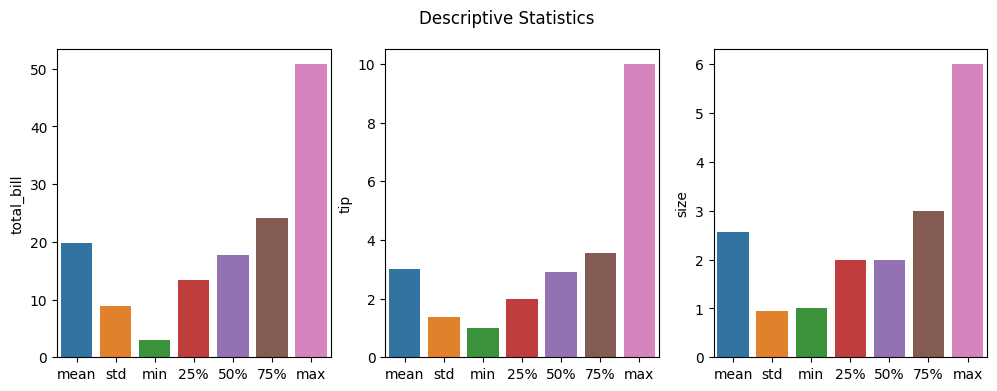

In [647]:
# for sub plots
fig, ax = plt.subplots(1,3, figsize=(12, 4))


# set the title of the figure
fig.suptitle('Descriptive Statistics')

# plot each column on a separate subplot
sns.barplot(data=descriptive_stats, x=descriptive_stats.index, y='total_bill',ax=ax[0])
sns.barplot(data=descriptive_stats, x=descriptive_stats.index, y='tip', ax=ax[1])
sns.barplot(data=descriptive_stats, x=descriptive_stats.index, y='size', ax=ax[2])

# display the plot
plt.show()

Text(0, 0.5, 'Value')

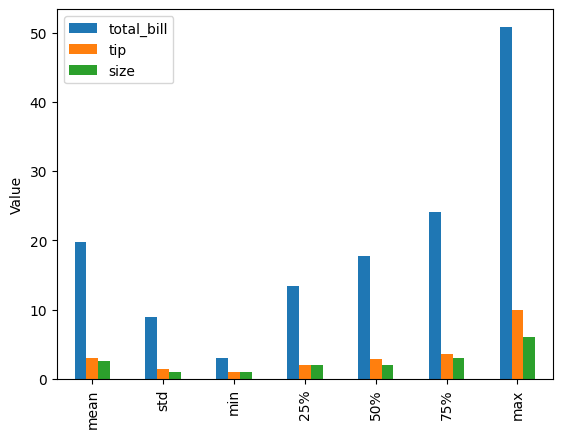

In [648]:

# Create a barplot of the statistics using the plot() method
ax = descriptive_stats.plot(kind='bar')
ax.set_ylabel('Value')


&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 


In [649]:
# Total number of males and females present in data set 

total_count = df['sex'].value_counts()
total_count



Male      157
Female     87
Name: sex, dtype: int64

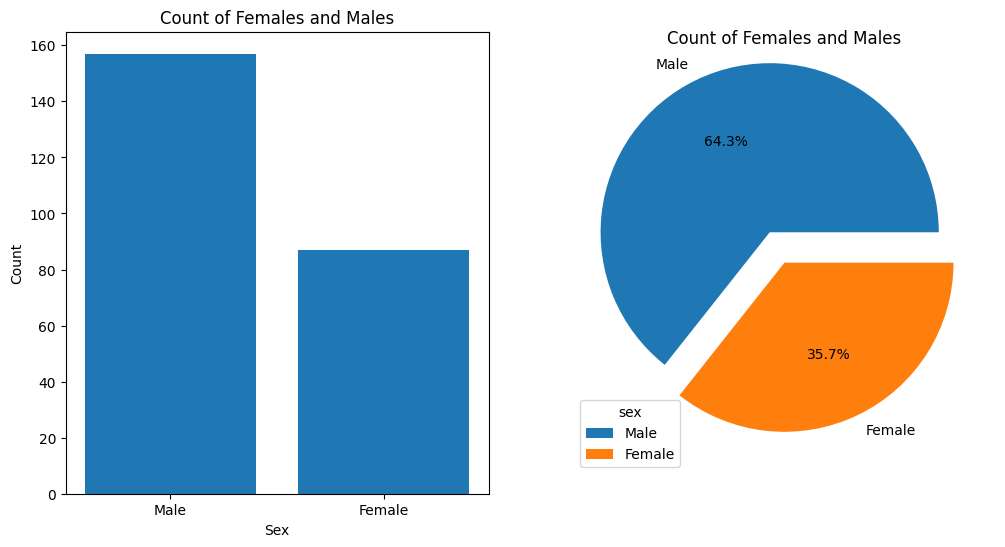

In [650]:
#subplots
fig, ax = plt.subplots(1,2,figsize=(12, 6))

# create a bar plot of the counts
ax[0].bar(total_count.index,total_count.values)

# set the axis labels and title
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count')
ax[0].set_title('Count of Females and Males')

# create a pie chart of the counts
ax[1].pie(total_count.values, labels=total_count.index, autopct='%1.1f%%',explode= (0.2,0))

# set the title
ax[1].set_title('Count of Females and Males')
ax[1].legend(title = "sex")
# display the plot
plt.show()


In [651]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

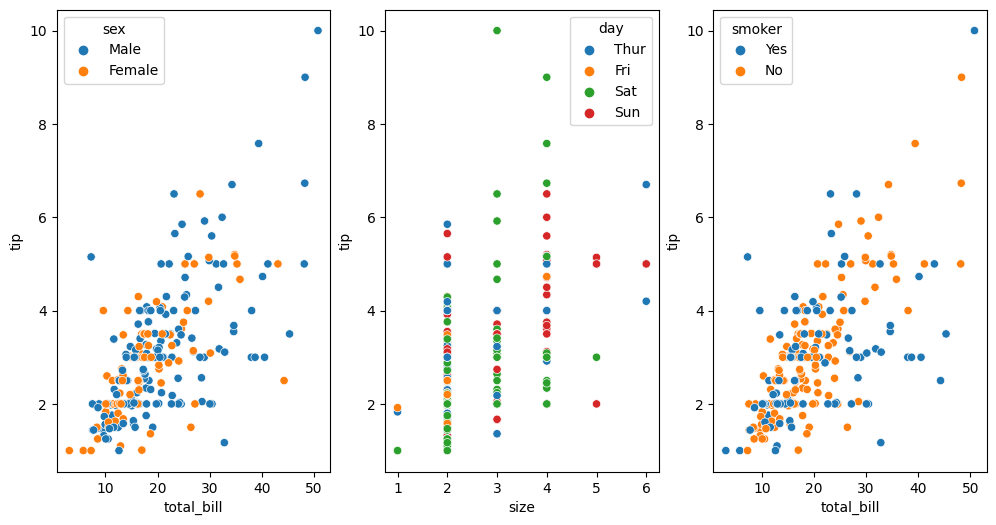

In [652]:
# total tips given by males and females
fig, ax = plt.subplots(1,3,figsize=(12, 6))
sns.scatterplot(data=df, x='total_bill', y= 'tip', hue='sex',ax =ax[0])
sns.scatterplot(data=df, x='size', y= 'tip', hue='day',ax=ax[1])
sns.scatterplot(data=df, x='total_bill', y= 'tip', hue='smoker',ax=ax[2])


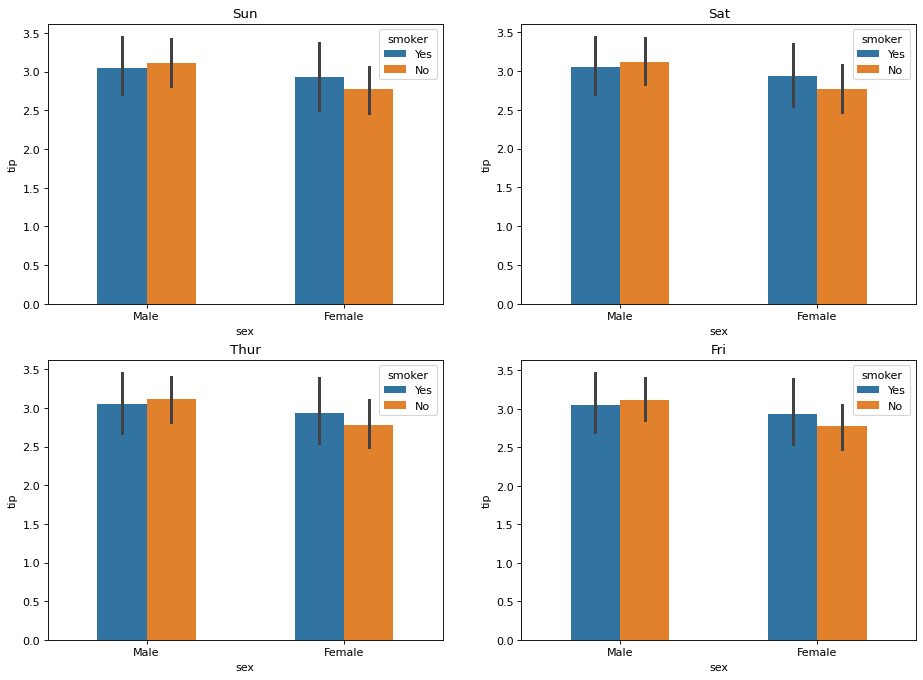

In [653]:
fig= plt.figure(dpi=80,figsize=(14, 10))
for i, day in enumerate(df['day'].unique()):
    ax=plt.subplot(2,2,i+1)
    sns.barplot(data =df, x='sex', y='tip', hue='smoker',width= .5)
    ax.set_title(day)





&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.


### Total number of tips given by males and females during lunch and dinner time

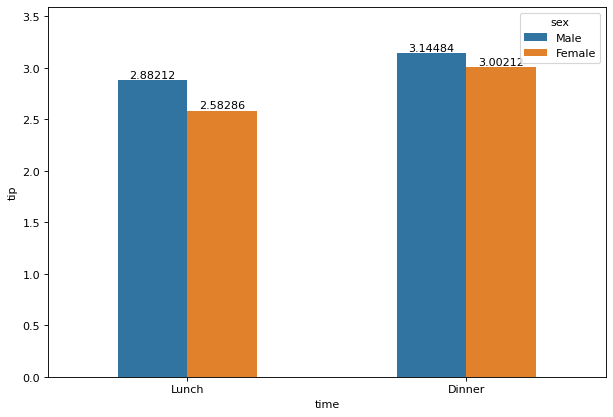

In [654]:
fig= plt.figure(dpi=80,figsize=(9, 6))
ax= sns.barplot(data =df, x='time', y='tip',hue='sex',errwidth=0,width=.5)

for container in ax.containers:
    ax.bar_label(container)

### Tips on lunch and dinner time of each day 

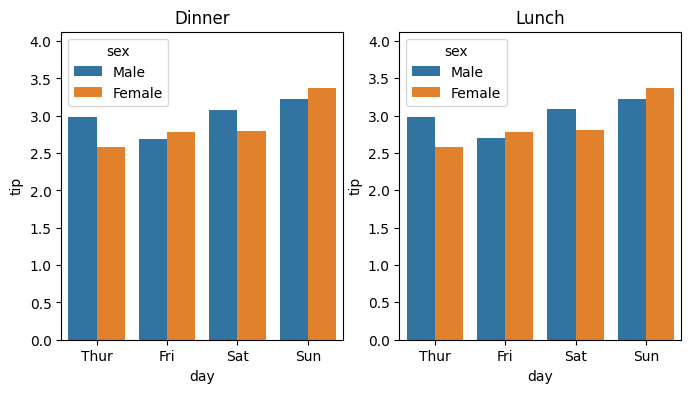

In [655]:
fig= plt.figure(dpi=100,figsize=(8, 4))
for i, time in enumerate(df['time'].unique()):
    ax=plt.subplot(1,2,i+1)
    sns.barplot(data =df, x='day', y='tip',hue='sex',errwidth=0)
    ax.set_title(time)
    

## 1. Train|test split 

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [656]:
X,y= df[['total_bill','size']], df["tip"]
X.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [657]:
# train|test split using scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape,y_train.shape, X_test.shape,y_test.shape

((195, 2), (195,), (49, 2), (49,))

## 2. Feature standardization 

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?


In [658]:
mu_train = X_train.mean()
sigma_train= X_train.std()

In [659]:
scaled_X_train = (X_train-mu_train)/sigma_train
scaled_X_test = (X_test-mu_train)/sigma_train

print(scaled_X_train.mean())
scaled_X_test.mean(),scaled_X_train.std(),scaled_X_test.std()

total_bill    9.337260e-17
size         -1.685262e-16
dtype: float64


(total_bill   -0.245133
 size         -0.024810
 dtype: float64,
 total_bill    1.0
 size          1.0
 dtype: float64,
 total_bill    1.060770
 size          1.064399
 dtype: float64)

# 3. Polynomial features

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [660]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2, include_bias=False)
scaled_X_train_ploy = polynomial.fit_transform(scaled_X_train) #  use the method fit on X_train'
scaled_X_train_ploy = polynomial.transform(scaled_X_train) # transform X_train'

scaled_X_test_poly = polynomial.transform(scaled_X_test) # transform X_test'

In [661]:
# X_test' with X_test'' where X_test}'' comes from fitting the polynomial features to X_test' and transforming X_test'

scaled_X_test_poly2 = polynomial.fit_transform(scaled_X_test)
scaled_X_test_poly_2 = polynomial.transform(scaled_X_test)


In [662]:
sum(scaled_X_test_poly == scaled_X_test_poly_2)

array([49, 49, 49, 49, 49])

In [663]:
sum(scaled_X_test_poly == scaled_X_test_poly_2) == len(scaled_X_test_poly)


array([ True,  True,  True,  True,  True])

## 4. Polynomial regression 

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 


In [664]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

RMSE_train= []
RMSE_test = []


for degree in range(1,5): # inclusive 4
    polynomial = PolynomialFeatures(degree, include_bias=False) # instantiate an object

    # Fit and transform X_train' and X_test' to create polynomial features
    train_features = polynomial.fit_transform(scaled_X_train)
    test_features= polynomial.transform(scaled_X_test)

    # Perform linear regression on the polynomial features
    linear_regression = LinearRegression()
    linear_regression.fit(train_features, y_train)

    # Predict on both the training and testing data
    y_pred_train = linear_regression.predict(train_features)
    y_pred_test = linear_regression.predict(test_features)
    
    # Calculate the RMSE for training and testing data and record them
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))


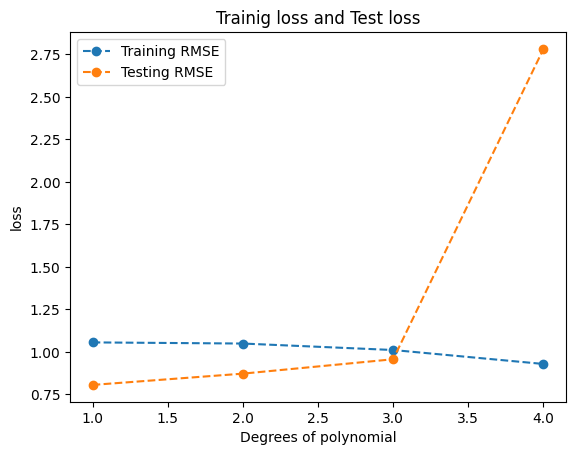

In [665]:
plt.plot(range(1,5), RMSE_train, 'o--', label='Training RMSE')
plt.plot(range(1,5), RMSE_test, 'o--', label='Testing RMSE')
plt.xlabel('Degrees of polynomial')
plt.ylabel('loss')
plt.title('Trainig loss and Test loss')
plt.legend()
plt.show()


## 5. Regularization methods 

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 





In [666]:
X.head(),y.head()

(   total_bill  size
 0       16.99     2
 1       10.34     3
 2       21.01     3
 3       23.68     2
 4       24.59     4,
 0    1.01
 1    1.66
 2    3.50
 3    3.31
 4    3.61
 Name: tip, dtype: float64)

In [667]:
from sklearn.preprocessing import MinMaxScaler

# Create polynomial features with degree 4
polynomial = PolynomialFeatures(degree=4, include_bias=False)
poly_features = polynomial.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

# Feature standardization
scaler = MinMaxScaler()
scaler.fit(X_train) # use the training data to fit the scaler

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [668]:
#mu_train = X_train.mean()
#sigma_train= X_train.std()

#scaled_X_train = (X_train-mu_train)/sigma_train
#scaled_X_test = (X_test-mu_train)/sigma_train



&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

In [669]:
from sklearn.linear_model import RidgeCV # ridge regression with cross-validation

model_ridgeCV = RidgeCV(alphas = [0.01, 0.1, 0.5, 1, 5, 10], scoring = "neg_mean_squared_error")
model_ridgeCV.fit(scaled_X_train, y_train)
print('Chosen alpha from cross-validation:', model_ridgeCV.alpha_)

Chosen alpha from cross-validation: 5.0


In [670]:
print('Weights:',model_ridgeCV.coef_) #Check the weights.

Weights: [0.84906977 0.32016033 0.58523995 0.66914708 0.24035503 0.45124456
 0.56794489 0.3644337  0.15581964 0.42322449 0.50049451 0.43499339
 0.20038625 0.09155859]


In [671]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

y_pred = model_ridgeCV.predict(scaled_X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)



print(f'Mean absolute error: {MAE:.3f} \nMean squared error:{MSE:.3f} \nRoot mean squared error:{RMSE:.3f}')

Mean absolute error: 0.823 
Mean squared error:1.129 
Root mean squared error:1.062


&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.



In [672]:
from sklearn.linear_model import LassoCV

# cv is k, k-fold
model_lassoCV = LassoCV(n_alphas = 100,max_iter=10000, cv=5)
model_lassoCV.fit(scaled_X_train, y_train)


c:\Users\vinee\.virtualenvs\Machine-learning-tetaV3aO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11206948384513282, tolerance: 0.030388666230769235
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\vinee\.virtualenvs\Machine-learning-tetaV3aO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17529473098664994, tolerance: 0.030388666230769235
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\vinee\.virtualenvs\Machine-learning-tetaV3aO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22060050530816966, tolerance: 0.030388666230769235
  model = cd_fast.enet_coordinate_descen

LassoCV(cv=5, max_iter=10000)

In [673]:
print('Chosen alpha from cross-validation:', model_lassoCV.alpha_)

Chosen alpha from cross-validation: 0.014128669472865986


In [674]:
print('Weights:',model_lassoCV.coef_) #Check the weights.

Weights: [1.77630352 0.         0.         2.58772684 0.         0.
 0.         0.         0.         0.         0.72899879 0.
 0.         0.        ]


In [675]:
y_pred = model_lassoCV.predict(scaled_X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean absolute error: {MAE:.3f} \nMean squared error:{MSE:.3f} \nRoot mean squared error:{RMSE:.3f}')

Mean absolute error: 0.774 
Mean squared error:1.005 
Root mean squared error:1.003


&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

In [676]:
from sklearn.linear_model import ElasticNetCV

# note that alpha here is lambda in the theory
# l1_ratio is alpha in the theory
model_elastic = ElasticNetCV(l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1])
model_elastic.fit(scaled_X_train, y_train)

c:\Users\vinee\.virtualenvs\Machine-learning-tetaV3aO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031018399369358463, tolerance: 0.030388666230769235
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\vinee\.virtualenvs\Machine-learning-tetaV3aO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035147182706424474, tolerance: 0.030388666230769235
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\vinee\.virtualenvs\Machine-learning-tetaV3aO\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.040256146304031404, tolerance: 0.030388666230769235
  model = cd_fast.enet_coordinate_des

ElasticNetCV(l1_ratio=[0.001, 0.01, 0.05, 0.1, 0.5, 0.9, 0.95, 1])

In [677]:
print('l1-ratio: ',model_elastic.l1_ratio_)

l1-ratio:  0.01


In [678]:
print('Chosen alpha from cross-validation:', model_elastic.alpha_)

Chosen alpha from cross-validation: 0.021474321319187775


In [679]:
print('Weights:',model_elastic.coef_) #Check the weights.

Weights: [0.95111204 0.33011628 0.59437198 0.7155264  0.23506267 0.43763824
 0.57666581 0.3648309  0.13852806 0.4296782  0.50905499 0.43103368
 0.18102168 0.06770004]


In [680]:
y_pred = model_elastic.predict(scaled_X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean absolute error: {MAE:.3f} \nMean squared error:{MSE:.3f} \nRoot mean squared error:{RMSE:.3f}')

Mean absolute error: 0.821 
Mean squared error:1.140 
Root mean squared error:1.068
